<img style="float: left;" src="../earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](../colored-bar.png)

## Earth Science Data Types Exercises 

Now that you have learned how to open and manipulate certain types of geospatial data in **Python**, it's time to test your skills! Complete the activites below. Feel free to work with a colleague or friend! 

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Open a Text File

Below there is a cell of imports that will help you with the challenges. The first challenge is to download this csv file containing information on the climbing formations in the boulder area here: 

https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv

Then, open it up in **Python** as a **pandas** dataframe. Once open, look at the information of the dataframe, and find the `FormationType` column. Notice how it's categorically split between two different types of formations.  
</div>

In [1]:
# Importing packages needed
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
# Download the data and open is up with pandas
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv")
et.io.HOME

OSMP_Climbing_Formations.csv


'/home/nathan'

In [3]:
pd_data = pd.read_csv(os.path.join(et.io.HOME, 'earth-analytics',
                                   'data', 'earthpy-downloads', 'OSMP_Climbing_Formations.csv'))
pd_data.head()

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,AKA,ClosureActive,PERMITREQ,FormationType,Display
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,First Areas,N,No,Boulder,Yes
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,NaN,N,No,Wall,Yes
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,NaN,N,No,Wall,Yes
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,NaN,Y,No,Wall,Yes
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,NaN,N,No,Wall,Yes


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Convert a DataFrame to a GeoDataFrame

You can make a GeoDataFrame from a DataFrame if there is coordinate data in the DataFrame. So when opening a text file, if there are columns for the x and y coordinates, you can give it spatial attributes. 

**GeoPandas** makes this easy with the `points_from_xy()` function. If you give that function a list (or **pandas** series) of x values, and a list of y values, it will make a `geometry` object you can use to make a GeoDataFrame. 

Make a GeoDataFrame from the text file you opened above. Use the **pandas** dataframe you've already created. Since you aren't reading this from a file, you can create the GeoDataFrame using the `GeoDataFrame()` function, with the first argument being the original DataFrame you've already created, and the second argument being `geometry=`, and have that be set to the output of `points_from_xy()`. </div>

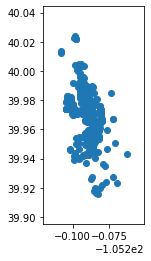

In [4]:
gpd_data = gpd.GeoDataFrame(
    data=pd_data, geometry=gpd.points_from_xy(pd_data.X, pd_data.Y))

gpd_data.plot()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Open a GeoJSON as a GeoDataFrame

To give your climbing formations plot context, it would be nice to see the boundary of the city of Boulder, so let's open it! Download the GeoJSON file from this link: 

https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson 

Open it using the `read_file()` function in **GeoPandas**. </div>

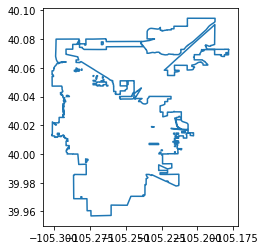

In [5]:
city = gpd.read_file(os.path.join(et.io.HOME, 'earth-analytics',
                                  "data", "earthpy-downloads", "City_Limits.geojson"))
city.boundary.plot()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Plot Two GeoDataFrames Together

Now plot both of the GeoDataFrames on the same plot! Recall that you can use matplotlib to plot both of the datsets on the same plot. 

In addition to plotting the two datasets together, let's clarify the data. While we now know where all of the climbing formations are, we could specify further.  Remember the `FormationType` column we saw earlier? Plot the points to differentiate based on that column.

HINT: This would be done in the same way that you plotted based on the population estimates in the vector lesson. 
</div>

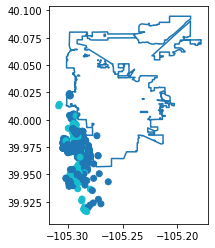

In [6]:
fig, ax = plt.subplots()

city.boundary.plot(ax=ax)
gpd_data.plot(ax=ax, column='FormationType')

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Make Your Map More Legible

While the map we currently made has all of the data that we need on it, we could definitely make it more legible to better convery the information. Plus it will just look better! Here's what you need to do to spruce up your map:

1. Give your rock formations colors that are distinct and easily seen when glancing at the map. You can set this with the `cmap=` argument within `plot()`. 
2. Give your map a title that clarifies the data being displayed. You can set this by using `ax.set_title()`, as we've done for previous plots. 
3. Set the `figsize` of the map to be larger so the data is more clearly shown. The `figsize` is one of the arguments in `plt.subplots` and needs to be set to a **tuple** of numbers, i.e. `(10, 10)`. 
4. While often you need x and y data ticks to show units of what you're plotting, it is less necessary in spatial plots. You can turn off the x and y axis data ticks with the line of code: `ax.set_axis_off()`.
5. To make the boundary of Boulder easier to read, it's better if you just use the outline of the polygon. To do this, instead of plotting a polygon with `polygon.plot()`, you can type `polygon.boundary.plot()` and the boundary will be plotted! 
6. The climbing formation markers are difficult to read, so adding some variety may help! Modify the `marker` and `markersize` parameters in the `plot()` function for the climbing formations in order to make it more legible. Here is a list of marker options in matplotlib: https://matplotlib.org/3.2.1/api/markers_api.html. 

With these changes hopefully your map becomes cleaner and easier to read!
</div>

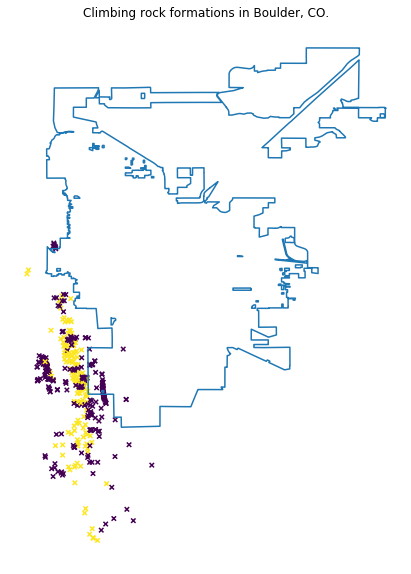

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

city.boundary.plot(ax=ax)
gpd_data.plot(ax=ax, column='FormationType',
              cmap="viridis", marker="x", markersize=20)
ax.set(title="Climbing rock formations in Boulder, CO.")
ax.set_axis_off()

## Explore Folium

We added context to this map with the outline of the City of Boulder, but there are other ways to add context too! One way would have been with an interactive map package, such as **Folium**. Set your GeoDataFrame name for your climbing formations to the variable specified in the code here:

```
import folium

#Define coordinates of where we want to center our map
boulder_coords = [40.015, -105.2705]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 13)

### ADD NAME 
coordinates = your_geodataframe_name

for la,lo in zip(cooridnates.x,cooridnates.y):
    folium.Marker(
        location=[la,lo],
    ).add_to(my_map)
    
my_map

```
and run it in the cell below to see what happens! 

More reading on how to use **Folium** [here](https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/)

In [8]:
import folium

# Define coordinates of where we want to center our map
boulder_coords = [40.015, -105.2705]

# Create the map
my_map = folium.Map(location=boulder_coords, zoom_start=13)

# ADD NAME
coordinates = gpd_data

for y, x in list(zip(coordinates.geometry.y, coordinates.geometry.x)):
    folium.Marker(
        location=[y, x],
    ).add_to(my_map)

my_map

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> BONUS Challenge: Clip Climbing Formations to the City of Boulder

Using the same function that was demonstrated in the vector notebook, clip the climbing formations to the boundary of the city of Boulder. Then re-plot the clipped formations onto the map with the city boundary to see which ones are inside of the boundary! 
</div>

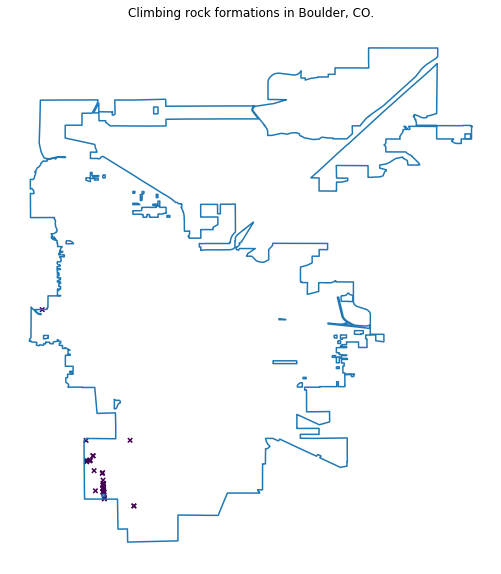

In [9]:
clip = gpd.clip(gpd_data, city)

fig, ax = plt.subplots(figsize=(10, 10))

city.boundary.plot(ax=ax)
clip.plot(ax=ax, column='FormationType',
          cmap="viridis", marker="x", markersize=20)
ax.set(title="Climbing rock formations in Boulder, CO.")
ax.set_axis_off()